# Practice Exercise 

# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 16 - Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [107]:
ins_df = pd.read_csv("insurance.csv")
ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [108]:
ins_df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [109]:
ins_df['sex'] = ins_df['sex'].replace({'male': 0 , 'female': 1})


In [110]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [111]:
ins_df['smoker'] = ins_df['smoker'].replace({'yes': 1 , 'no': 0})
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [112]:
#ins_df = pd.get_dummies(ins_df, columns=['region'])

In [113]:
#ins_df.head()

In [114]:
ins_df.isnull().values.any()

False

In [115]:
ins_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Question 17 - Check the distribution of expenses(charges) and state your insights.

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


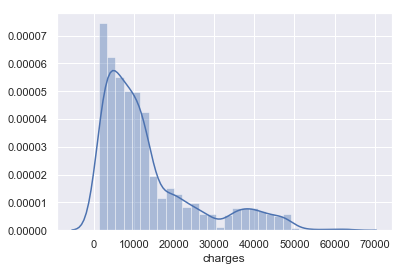

In [116]:
sns.distplot(ins_df['charges'])

Insights
1)The distribution is skewed and has a long tail to the right. 
   Also, the mean for expenses column is more than the median, hence this is right skewed distribution
2)Most of the people have yearly medical expenses between zero and 15,000 despite the distribution beig a right skewed distribution. Hence, we need to check for the outliers


# Question 18 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [117]:
ins_df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


In [118]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

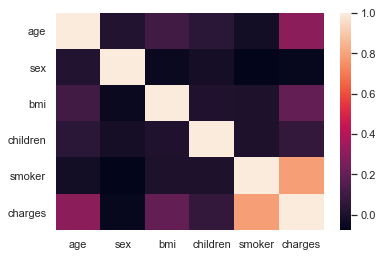

In [119]:
corr = ins_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [120]:
# The correlation coefficient of smoker and charges seems to be very high. Hence, we can say that there is a strong relationship between the two variables


# Question 19 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

C:\Users\hp\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


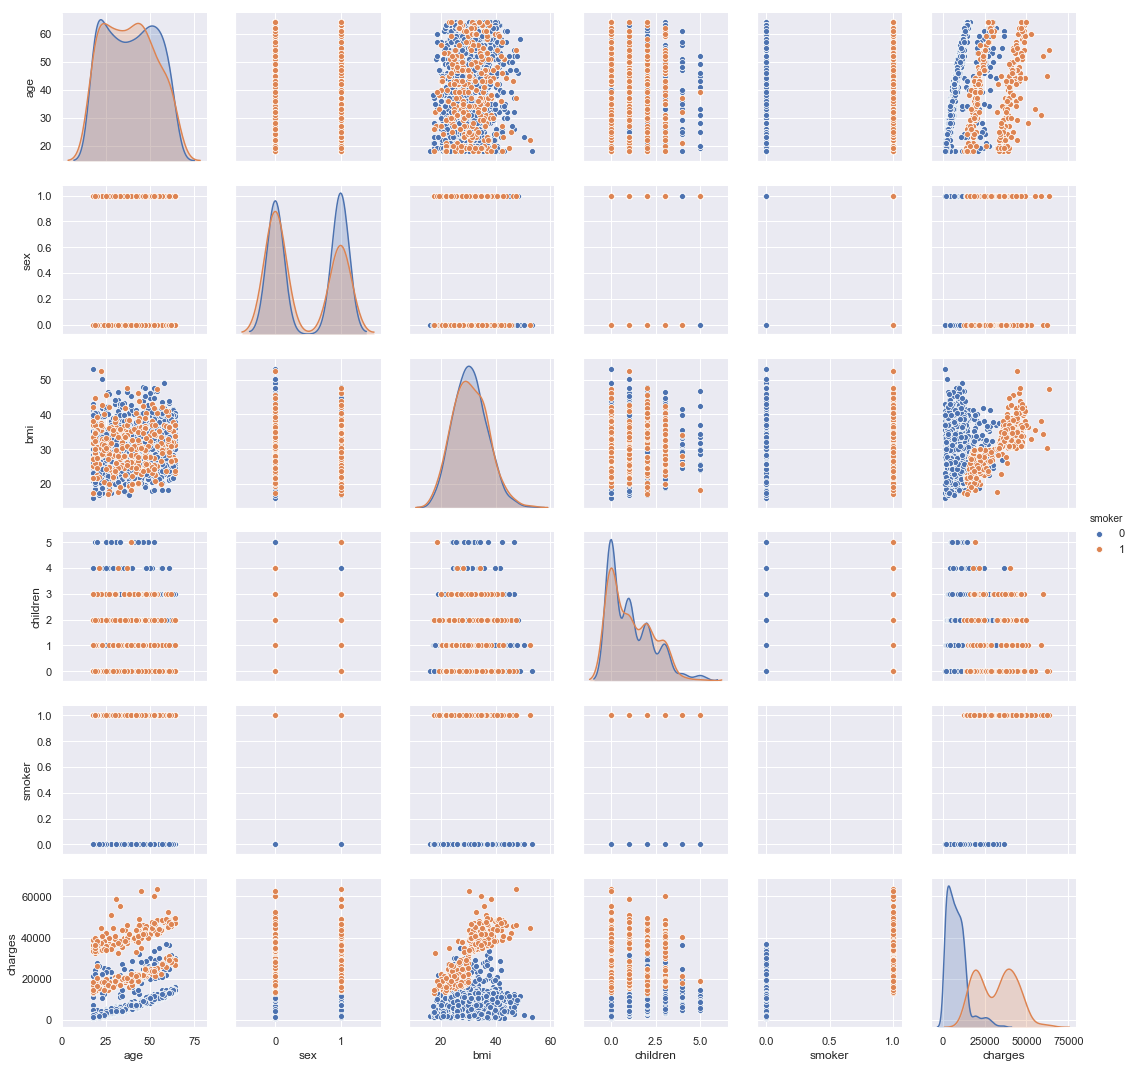

In [121]:
ins_df_attr = ins_df.iloc[:, 0:7]
sns.pairplot(ins_df_attr, diag_kind='kde' , hue= 'smoker')

In [122]:
# The distribution of data across various dimension looks normal for bmi and sex
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Question 20 - Get the train and test data from your dataset.

In [123]:
X = ins_df.drop('charges', axis=1)
Y = ins_df['charges']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=0)

# Question 21 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [125]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [126]:
X_train = pd.get_dummies(X_train, columns=['region'])


In [127]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1163,18,1,28.215,0,0,1,0,0,0
196,39,1,32.800,0,0,0,0,0,1
438,52,1,46.750,5,0,0,0,1,0
183,44,1,26.410,0,0,0,1,0,0
1298,33,0,27.455,2,0,0,1,0,0


In [128]:
X_test = pd.get_dummies(X_test, columns=['region'])

In [129]:
X_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
578,52,0,30.200,1,0,0,0,0,1
610,47,1,29.370,1,0,0,0,1,0
569,48,0,40.565,2,1,0,1,0,0
1034,61,0,38.380,0,0,0,1,0,0
198,51,1,18.050,0,0,0,1,0,0


# Question 22 - Train your model.

In [130]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Question 23 - Fit your model and get the summary of model.

In [131]:
regression_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
regression_model.score(X_test, Y_test)

0.7909160991789904

In [133]:
regression_model.score(X_train, Y_train)

0.7309569871174701

In [134]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
1163,18,1,28.215,0,0,1,0,0,0,2200.83085
196,39,1,32.800,0,0,0,0,0,1,5649.71500
438,52,1,46.750,5,0,0,0,1,0,12592.53450
183,44,1,26.410,0,0,0,1,0,0,7419.47790
1298,33,0,27.455,2,0,0,1,0,0,5261.46945


In [135]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'charges ~ age+sex+bmi+children+smoker+region_northeast+region_northwest+region_southeast+region_southwest', data = data_train).fit()
lm1.params

Intercept           -9977.504903
age                   256.435447
sex                    47.546755
bmi                   335.369073
children              472.709789
smoker              23435.991169
region_northeast    -1905.351535
region_northwest    -2467.252681
region_southeast    -2900.100215
region_southwest    -2704.800472
dtype: float64

In [136]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     314.8
Date:                Tue, 22 Jan 2019   Prob (F-statistic):          3.47e-258
Time:                        21:07:12   Log-Likelihood:                -9495.3
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     927   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9977.5049    956.169  

# Question 24 - Predict the charges and evaluate the model performance. ( 1 point)

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [137]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [138]:
y_pred = regression_model.predict(X_test)

In [139]:
#MAE
mean_absolute_error(Y_test , y_pred)

4011.4496793279855

In [140]:
#MSE
mse = mean_squared_error(Y_test, y_pred)
mse

33342497.82695458

In [141]:
# RMSE
import math

rmse = math.sqrt(mse)
rmse

5774.296305780868

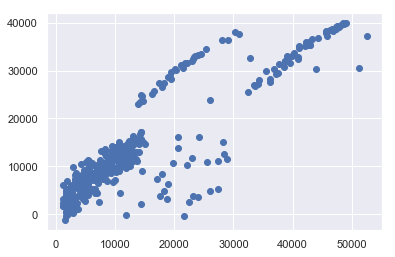

In [144]:
plt.scatter(Y_test, y_pred)


In [145]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Question 25 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

1) A person who smokes and has a high bmi may have higher charges as compared to a person who has lower bmi and is a non-smoker.
2) Convert the values of columns to therir respective Z scores
3) Introduce a relationship between Smoker and BMI (New = Smoker*BMI)
4) Drop the region column



In [170]:
ins = ins_df
ins =ins.drop('region' , axis=1)
ins.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [166]:
from scipy.stats import zscore

ins_scaled  = ins.apply(zscore)

In [167]:
ins_scaled = pd.DataFrame(ins_scaled, columns=ins.columns)

In [169]:
ins_scaled.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.298584
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.953689
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-0.728675
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,0.719843
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-0.776802


In [176]:
ins_scaled["new"] = ins_scaled['bmi']* ins_scaled['smoker']
ins_scaled.head()

,age,sex,bmi,children,smoker,charges,new
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.298584,-0.893306
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.953689,-0.258614
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-0.728675,-0.194514
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,0.719843,0.662509
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-0.776802,0.148462


In [177]:
X = ins_scaled.drop('charges', axis=1)


In [178]:
Y = ins_scaled['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=0)
regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)
regression_model.score(X_test, Y_test)

0.8719725929940929

In [179]:
regression_model.score(X_train, Y_train)

0.8231543798987171